In [1]:

import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import powerlaw

In [2]:
#Recuerda que es el codigo de Pornpanit, cambiar nombres de variables
with open('yelp_user.json') as f:      
    data = f.readlines()
    #this line below may take at least 8-10 minutes of processing for 4-5 million rows. It converts all strings in list to actual json objects. 
    data = list(map(json.loads, data)) 

user= pd.DataFrame(data)
user.head()
user.to_csv('yelp_user.csv', index = False, header=True)

In [3]:
with open('yelp_business.json') as f:      
    data = f.readlines()
    data = list(map(json.loads, data)) 

business= pd.DataFrame(data)
business.head()
business.to_csv('yelp_business.csv', index = False, header=True)

In [4]:
with open('yelp_review.json') as f:      
    data = f.readlines()
    data = list(map(json.loads, data)) 

review= pd.DataFrame(data)
review.head()
review.to_csv('yelp_review.csv', index = False, header=True)

In [74]:
min(user["yelping_since"])

'2004-10'

In [5]:
review = review[["user_id","review_id","business_id"]]

In [6]:
quebec = business[["business_id", "review_count","state"]]
quebec = quebec.loc[quebec["state"] == "QC"]

In [7]:
quebec_review = pd.merge( quebec,review, on=['business_id'])
quebec_review = quebec_review.sort_values(by=['user_id'])
quebec_review = quebec_review.reset_index(drop=True)

In [103]:
L = len(quebec_review)
user_review_count = np.zeros((L,1))

count = 0
count_reviews = 0
for i in range(L-1):
    count_reviews = count_reviews +1
    if (quebec_review["user_id"][i+1]) != (quebec_review["user_id"][i]):
        user_review_count[count] = count_reviews
        count = count+1
        count_reviews = 0
    
user_review_count = user_review_count[user_review_count > 0] #Eliminating the zeros

alpha right =  1.6406385302226052
MSE =  0.02251155088972881
3.468523479357075


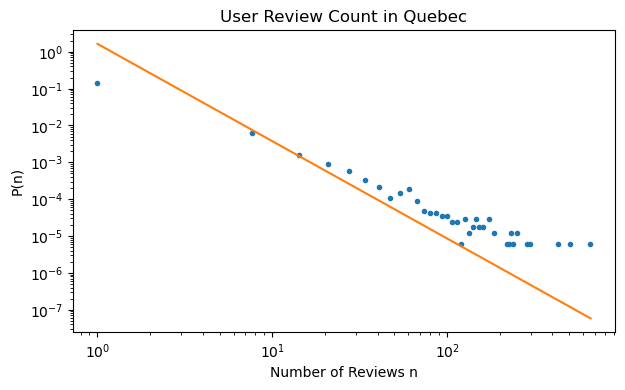

In [104]:
#PDF of User Review Count
NB = 100
h,xr = np.histogram(user_review_count,NB, density = True)

#Data doesnt have to be sorted
T = len(user_review_count);
rmin = min(user_review_count)
suma = 0

for j in range(T):
    suma = suma + np.log((user_review_count[j]/rmin))
alpha = T/suma #Maximum Likelihood alpha for right tail
print("alpha right = ",alpha)
#alpha = 1.52 Si nos reduce algo el error
x = np.linspace(min(user_review_count),max(user_review_count),100)
f = (alpha/rmin)*((x/rmin)**(-(alpha+1))) #y values of power law distribution

plot0 = plt.figure(0,figsize=(7,4), dpi=100)
plt.title('User Review Count in Quebec')
plt.ylabel('P(n)')
plt.xlabel('Number of Reviews n')
plt.yscale('log')
plt.xscale('log')
plt.plot(xr[:-1],h,".")
plt.plot(x,f)

# Mean squared error
N = len(x)
acum = 0
for i in range(N):
    acum = acum + (f[i]-h[i])**2
MSE = acum/N
print("MSE = ",MSE)
print(np.mean(user_review_count))

KS Test =  0.5477466120390797 0.0


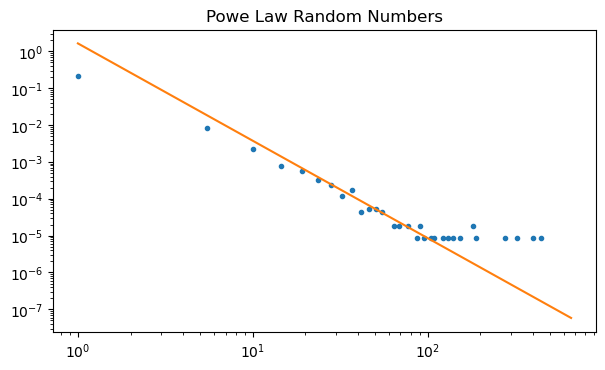

In [105]:
a, xmin = alpha+1, rmin
N = 25000

# generates random numbers of power law distribution
rand_pl = powerlaw.Power_Law(xmin=xmin, parameters=[a]).generate_random(N)
rand_pl = rand_pl[:-3]

NB = 100
h2,xr2 = np.histogram(rand_pl,NB, density = True)
x5 = np.linspace(min(user_review_count),max(user_review_count),100)
f5 = (alpha/rmin)*((x/rmin)**(-(alpha+1))) #y values of power law distribution

plot1 = plt.figure(1,figsize=(7,4), dpi=100)
plt.title('Powe Law Random Numbers')
plt.plot(xr2[:-1],h2,".")
plt.yscale('log')
plt.xscale('log')
plt.plot(x5,f5)
o,p = stats.kstest(user_review_count,rand_pl[:-3])
print("KS Test = ",o,p)


Text(0.5, 1.0, 'QQ Plot')

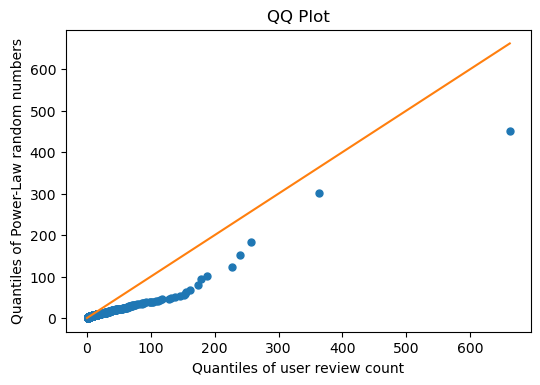

In [106]:
## QQ Plot User Review Count
num = 10000
user_q = np.zeros(num)
rand_pl_q =np.zeros(num)

xq = np.linspace(0,max((max(user_review_count),max(rand_pl))),1000)
for i in range(num):
    user_q[i] = np.quantile(user_review_count,(i+1)/num)
    rand_pl_q[i] = np.quantile(rand_pl,(i+1)/num)
plot2 = plt.figure(2,figsize=(6,4), dpi=100)
plt.plot(user_q,rand_pl_q,".",markersize=10)
plt.plot(xq,xq)
plt.xlabel("Quantiles of user review count")
plt.ylabel("Quantiles of Power-Law random numbers")
plt.title("QQ Plot")

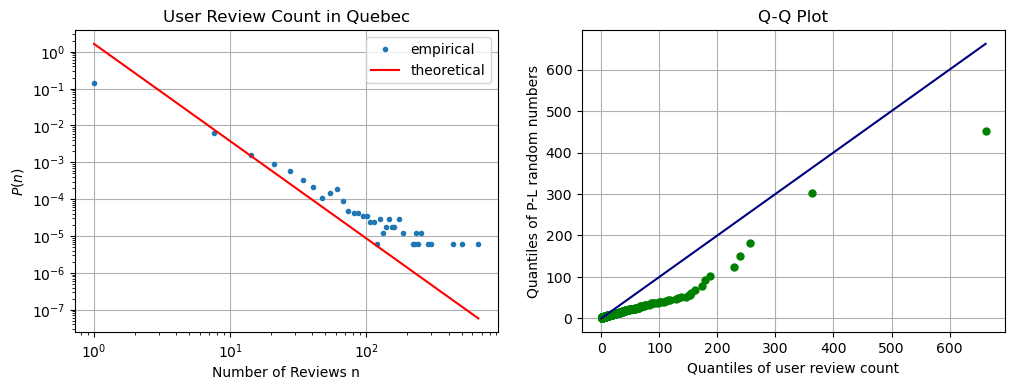

In [108]:
# PLOTS FOR DOCUMENT part 1

plot6 = plt.figure(6,figsize=(12,4), dpi=100)

plt.subplot(1,2,1)
plt.title('User Review Count in Quebec')
plt.ylabel('$P(n)$')
plt.xlabel('Number of Reviews n')
plt.yscale('log')
plt.xscale('log')
plt.plot(xr[:-1],h,".", label = "empirical")
plt.plot(x,f,"red", label = "theoretical")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(user_q,rand_pl_q,".g",markersize=10)
xq = np.linspace(0,max((max(user_review_count),max(rand_pl_q))),1000)
plt.plot(xq,xq,"navy")
plt.xlabel("Quantiles of user review count")
plt.ylabel("Quantiles of P-L random numbers")
plt.title("Q-Q Plot")
plt.grid()
plt.savefig('user-review-count.png')

In [13]:
'''#BOOTSTRAP LENTISIMO
bts = 0.8; # Fraction of data to be retained in each bootstrap sample
Nbts = 3; # Number of bootstrap samples
alpha = 0.9; # Significance level PARA QUE SE USOOOOOOOOOOOOOOOOOOOOOOOOO??????????????

#Right Tail with bootstrap
alpha_right_bts = np.zeros([Nbts,1]); # Vector to collect bootstrap estimates for right tail exponent

for i in range(Nbts):
    print(i)
    r_bts = user_review_count[np.random.permutation(len(user_review_count))] # Random permutation of returns (literal randomiza el orden de returns)
    indice = int(np.round(bts*len(r_bts))) #Index at 80% value
    r_bts = r_bts[:indice]
    r_bts = np.sort(r_bts, axis = 0)
    plt.plot(r_bts)

    N_bts = len(r_bts); # Number of bootstrapped returns
    suma = 0
    for v in range(N_bts):
        suma = suma + np.log((r_bts[v]/min(r_bts)))
    alpha_right_bts[i] = N_bts/suma

alpha_right_bts = np.sort(alpha_right_bts, axis = 0)

plt.figure(5)
plt.boxplot(alpha_right_bts)'''

'#BOOTSTRAP LENTISIMO\nbts = 0.8; # Fraction of data to be retained in each bootstrap sample\nNbts = 3; # Number of bootstrap samples\nalpha = 0.9; # Significance level PARA QUE SE USOOOOOOOOOOOOOOOOOOOOOOOOO??????????????\n\n#Right Tail with bootstrap\nalpha_right_bts = np.zeros([Nbts,1]); # Vector to collect bootstrap estimates for right tail exponent\n\nfor i in range(Nbts):\n    print(i)\n    r_bts = user_review_count[np.random.permutation(len(user_review_count))] # Random permutation of returns (literal randomiza el orden de returns)\n    indice = int(np.round(bts*len(r_bts))) #Index at 80% value\n    r_bts = r_bts[:indice]\n    r_bts = np.sort(r_bts, axis = 0)\n    plt.plot(r_bts)\n\n    N_bts = len(r_bts); # Number of bootstrapped returns\n    suma = 0\n    for v in range(N_bts):\n        suma = suma + np.log((r_bts[v]/min(r_bts)))\n    alpha_right_bts[i] = N_bts/suma\n\nalpha_right_bts = np.sort(alpha_right_bts, axis = 0)\n\nplt.figure(5)\nplt.boxplot(alpha_right_bts)'

alpha right =  0.9009722924157059
MAPE =  0.9708774327416735


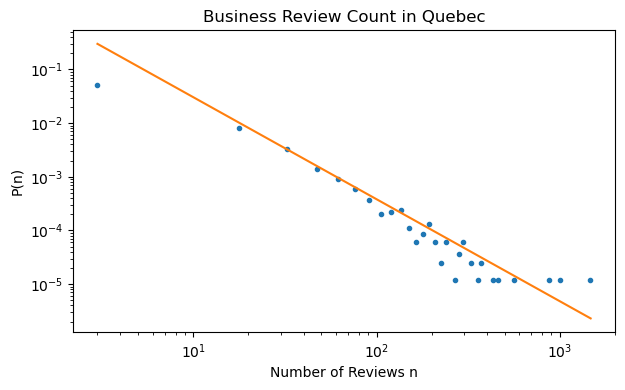

In [87]:
business_review = quebec["review_count"]
business_review = business_review.reset_index(drop=True)

#PDF
NB = 100
h3,xr3 = np.histogram(business_review,NB, density = True);

#Calculating alpha to aproximate to a power law
T = len(business_review);
rmin = min(business_review)
suma = 0

for j in range(T):
    suma = suma + np.log((business_review[j]/rmin))
alpha = T/suma #Maximum Likelihood alpha for right tail
print("alpha right = ",alpha)

x2 = np.linspace(min(business_review),max(business_review),100)
f2 = (alpha/rmin)*((x2/rmin)**(-(alpha+1))) #y values of power law distribution


plot3 = plt.figure(3,figsize=(7,4), dpi=100)
plt.title('Business Review Count in Quebec')
plt.ylabel('P(n)')
plt.xlabel('Number of Reviews n')
plt.yscale('log')
plt.xscale('log')
plt.plot(xr3[:-1],h3,".")
plt.plot(x2,f2)
#plt.plot(m[:-1],s,"x")

N = len(x2)
acum = 0
for i in range(N):
    acum = acum + np.absolute((f2[i]-h2[i])/f2[i])
MAPE = acum/N
print("MAPE = ",MAPE)



KS Test =  0.053850971185744445 2.2402896655974427e-14


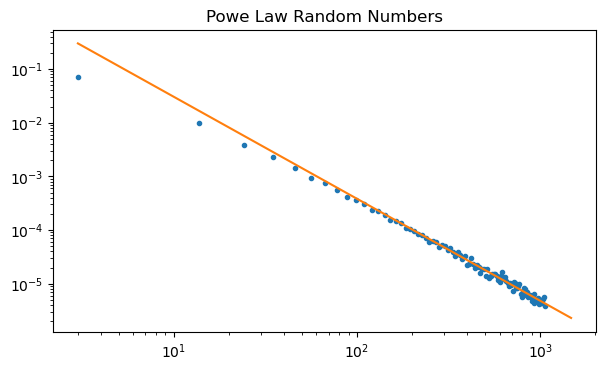

In [88]:
a, xmin = alpha+1, rmin
N = 500000
# generates random numbers of power law distribution
rand_p2 = powerlaw.Power_Law(xmin=xmin, parameters=[a]).generate_random(N)
rand_p2= np.sort(rand_p2)
rand_p2 = np.round(rand_p2[:497500]) # Mensionar restriccion

#PDF
NB = 100
h4,xr4 = np.histogram(rand_p2,NB, density = True)

plot4 = plt.figure(4,figsize=(7,4), dpi=100)
plt.title('Powe Law Random Numbers')
plt.plot(xr4[:-1],h4,".")
plt.yscale('log')
plt.xscale('log')
plt.plot(x2,f2)
o,p = stats.kstest(business_review,rand_p2)
print("KS Test = ",o,p)

KS Test =  0.053850971185744445 2.2402896655974427e-14


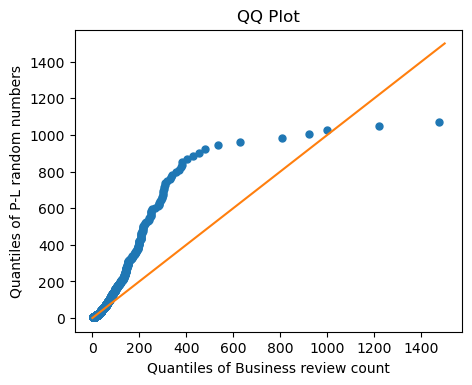

In [89]:
num = 10000
business_q = np.zeros(num)
rand_p2_q =np.zeros(num)

xq2 = np.linspace(0,1500,1000)
for i in range(num):
    business_q[i] = np.quantile(business_review,(i+1)/num)
    rand_p2_q[i] = np.quantile(rand_p2,(i+1)/num)
plot5 = plt.figure(5,figsize=(5,4), dpi=100)
plt.xlabel("Quantiles of Business review count")
plt.ylabel("Quantiles of P-L random numbers")
plt.title("QQ Plot")
plt.plot(business_q,rand_p2_q,".",markersize=10)
plt.plot(xq2,xq2)

o,p = stats.kstest(rand_p2,business_review)
print("KS Test = ",o,p)

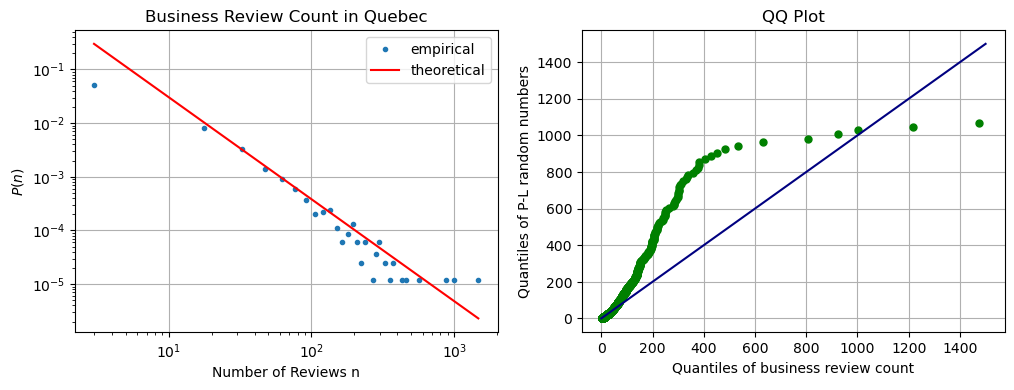

In [97]:
# PLOTS FOR DOCUMENT part 2
plot5 = plt.figure(5,figsize=(12,4), dpi=100)

plt.subplot(1,2,1)
plt.title('Business Review Count in Quebec')
plt.ylabel('$P(n)$')
plt.xlabel('Number of Reviews n')
plt.yscale('log')
plt.xscale('log')
plt.plot(xr3[:-1],h3,".",label = "empirical")
plt.plot(x2,f2,"red", label = "theoretical")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Quantiles of business review count")
plt.ylabel("Quantiles of P-L random numbers")
plt.title("QQ Plot")
plt.plot(business_q,rand_p2_q,".g",markersize=10)
xs = np.linspace(0,1500,100)
plt.plot(xs,xs,"navy")
#plt.grid()
plt.savefig('business-review-count.png')


In [98]:
# RQ2 

# ARIZONA AND NEVADA ARE INCREDIBLY SIMILAR WTF
stars = business[["stars","state","categories"]]

#pen = stars.loc[stars["state"] == "PA"]
pen = stars.loc[stars["state"] == "NV"]
pen_rest = pen[pen['categories'].apply(lambda x: "Restaurants" in x)]
pen_rest = pen_rest.reset_index(drop=True)
PA_rest_stars = pen_rest["stars"]


arizona = stars.loc[stars["state"] == "AZ"]
#arizona = stars.loc[stars["state"] == "IL"]
arizona_rest = arizona[arizona['categories'].apply(lambda x: "Restaurants" in x)]
arizona_rest = arizona_rest.reset_index(drop=True)
AZ_rest_stars = arizona_rest["stars"]


In [99]:
#Calculating Statistical Properties

# Pitsburg
Np = len(PA_rest_stars);
mp = np.sum(PA_rest_stars)/Np;                 
sp = np.sqrt(np.sum((PA_rest_stars-mp)**2)/Np); 
skp = np.sum((PA_rest_stars-mp)**3)/(Np*(sp**3))
Ekp = np.sum((PA_rest_stars-mp)**4)/(Np*(sp**4))-3

# Arizona
Na = len(AZ_rest_stars);
ma = np.sum(AZ_rest_stars)/Na;                 
sa = np.sqrt(np.sum((AZ_rest_stars-ma)**2)/Na); 
ska = np.sum((AZ_rest_stars-ma)**3)/(Na*(sa**3))
Eka = np.sum((AZ_rest_stars-ma)**4)/(Na*(sa**4))-3



print('\n')
print("MEAN PA =",mp, "AZ =",ma)
print("S.DEVIATION PA = ",sp,"AZ =",sa)
print("SKEWNESS PA = ", skp, "AZ =",ska)
print("EXESS KURTOSIS PA = ",Ekp, "AZ =",Eka)
print('\n')



MEAN PA = 3.4190629228687417 AZ = 3.408136204518935
S.DEVIATION PA =  0.766289233609248 AZ = 0.7665950495482436
SKEWNESS PA =  -0.48053566737960696 AZ = -0.4849850086229843
EXESS KURTOSIS PA =  -0.08053352477841225 AZ = -0.03327790938024089




In [100]:
a,b = stats.kstest(PA_rest_stars,AZ_rest_stars)
print(a,b)
# if we reject the null does that mean that we are accepting the alternative hypothesis?? > Creo que si
# https://www.youtube.com/watch?v=eyknGvncKLw
# tener p value menor a .05 tenemos strong evidence, mayor es weak evidence 

0.008442912872406196 0.9554422504755535


0.008442912872406283


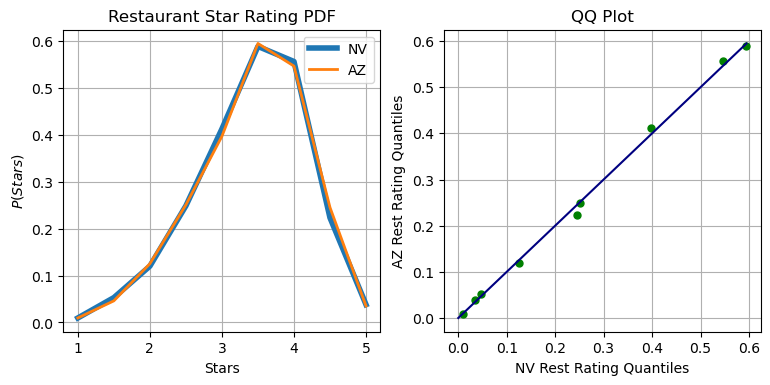

In [102]:
#PDF
NB = 9
v = True
h7,xr7 = np.histogram(PA_rest_stars,NB, density = v)

h8,xr8 = np.histogram(AZ_rest_stars,NB, density = v)

x7 = np.linspace(1,5,9) # new linspace for x para que cada bin este centrado en una estrella


# Computing CDF

CDF_PA = np.cumsum(h7)*(xr7[1]-xr7[0])
CDF_AZ = np.cumsum(h8)*(xr8[1]-xr8[0])

# Plotting
plot6 = plt.figure(6,figsize=(9,4), dpi=100)

plt.subplot(1,2,1)
plt.plot(x7,h8,linewidth=4, label = "NV")
plt.plot(x7,h7,linewidth=2, label = "AZ")
plt.xlabel("Stars")
plt.ylabel("$P(Stars)$")
plt.title("Restaurant Star Rating PDF")
plt.grid()
plt.legend()
#plt.subplot(1,3,2)
#plt.plot(x7,CDF_PA)
#plt.plot(x7,CDF_AZ)

plt.subplot(1,2,2)
plt.plot(h7,h8,"g.",markersize = 10)
xp = np.linspace(0,max(h7),100)
plt.plot(xp,xp,"navy")
plt.xlabel("NV Rest Rating Quantiles")
plt.ylabel("AZ Rest Rating Quantiles")
plt.title("QQ Plot")
plt.grid()
#plt.savefig('stars.png')

D = CDF_PA - CDF_AZ
print(max(np.absolute(D))) #Ya nos da igual!!
    
    

[  25  121  329  659 1043 1563 1436  644   92]
[  40  222  503 1042 1729 2466 2331  935  159]
Stars  Pensilvania %                 Arizona %                 Diff%
1.0   0.42286874154262516 %   0.4243131430996075 % 0.0014444015569823332
1.5   2.0466847090663056 %   2.3549379442028218 % 0.30825323513651615
2.0   5.564952638700947 %   5.335737774477565 % 0.22921486422338244
2.5   11.1468200270636 %   11.053357377744776 % 0.09346264931882331
3.0   17.642083897158322 %   18.340935610480535 % 0.6988517133222132
3.5   26.437753721244924 %   26.158905272090802 % 0.2788484491541219
4.0   24.28958051420839 %   24.726848414129627 % 0.43726789992123827
4.5   10.893098782138024 %   9.918319719953326 % 0.9747790621846981
5.0   1.5561569688768606 %   1.6866447438209398 % 0.13048777494407915


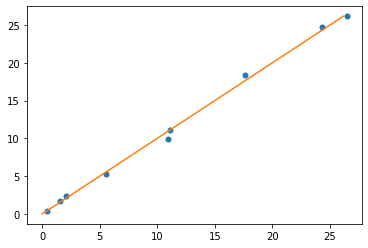

In [76]:
NB = 9
h3,xr3 = np.histogram(PA_rest_stars,NB)
h4,xr4 = np.histogram(AZ_rest_stars,NB)
print(h3)
print(h4)

PA_percentages = np.zeros(9)
AZ_percentages = np.zeros(9)
print("Stars  Pensilvania %                 Arizona %                 Diff%")
for i in range(NB):
    PA_percentages[i]= h3[i]*100/(sum(h3))
    AZ_percentages[i]= h4[i]*100/(sum(h4))
    diff = np.absolute(PA_percentages[i]-AZ_percentages[i])
    print(1+(i*.5)," ",PA_percentages[i],"%  ",AZ_percentages[i],"%",diff)
plt.plot(PA_percentages,AZ_percentages,".",markersize = 10)
x = np.linspace(0,max(AZ_percentages),100)
plt.plot(x,x)

In [412]:
#pip install powerlaw